# INFO 

## DATASET Nutrition Survey
From: [https://www.kaggle.com/cdc/national-health-and-nutrition-examination-survey](https://www.kaggle.com/cdc/national-health-and-nutrition-examination-survey).

### Context
The [National Health and Nutrition Examination Survey (NHANES)](https://www.cdc.gov/Nchs/Nhanes/about_nhanes.htm) is a program of studies designed to assess the health and nutritional status of adults and children in the United States. The survey is unique in that it combines interviews and physical examinations. NHANES is a major program of the National Center for Health Statistics (NCHS). NCHS is part of the Centers for Disease Control and Prevention (CDC) and has the responsibility for producing vital and health statistics for the Nation.

The NHANES program began in the early 1960s and has been conducted as a series of surveys focusing on different population groups or health topics. In 1999, the survey became a continuous program that has a changing focus on a variety of health and nutrition measurements to meet emerging needs. The survey examines a nationally representative sample of about 5,000 persons each year. These persons are located in counties across the country, 15 of which are visited each year.

The NHANES interview includes demographic, socioeconomic, dietary, and health-related questions. The examination component consists of medical, dental, and physiological measurements, as well as laboratory tests administered by highly trained medical personnel.

To date, [thousands of research findings have been published using the NHANES data](https://www.ncbi.nlm.nih.gov/pubmed?orig_db=PubMed&term=NHANES&cmd=search).


### Content
In the `data/nutrition_survey` folder you can find the 2013-2014 NHANES datasets. It includes the following components:

##### 1. Demographics dataset:

A complete variable dictionary can be found [here](https://wwwn.cdc.gov/Nchs/Nhanes/Search/variablelist.aspx?Component=Demographics&CycleBeginYear=2013).

##### 2. Examinations dataset, which contains:

A complete variable dictionary can be found [here](https://wwwn.cdc.gov/Nchs/Nhanes/Search/variablelist.aspx?Component=Examination&CycleBeginYear=2013).

##### 3. Dietary data - total nutrient intake, first day:

A complete variable dictionary can be found [here](https://wwwn.cdc.gov/Nchs/Nhanes/Search/variablelist.aspx?Component=Dietary&CycleBeginYear=2013).

##### 4. Laboratory dataset, which includes:

A complete data dictionary can be found [here](https://wwwn.cdc.gov/Nchs/Nhanes/Search/variablelist.aspx?Component=Laboratory&CycleBeginYear=2013).

##### 5. Questionnaire dataset, which includes information on:

A complete variable dictionary can be found [here](https://wwwn.cdc.gov/Nchs/Nhanes/Search/variablelist.aspx?Component=Questionnaire&CycleBeginYear=2013).

##### 6. Medication dataset, which includes prescription medications:

A complete variable dictionary can be found [here](https://wwwn.cdc.gov/Nchs/Nhanes/Search/variablelist.aspx?Component=Questionnaire&CycleBeginYear=2013).

### Acknowledgements
Original data and additional documents related to the datasets or NHANES can be found [here](https://wwwn.cdc.gov/Nchs/Nhanes/Default.aspx).

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, FunctionTransformer
from sklearn.impute import SimpleImputer

In [4]:
pd.options.display.max_columns = None

In [5]:
%matplotlib inline

## DATA EXPLORATION

In [6]:
demographic_df = pd.read_csv("../data/nutrition_survey/demographic.csv", encoding='latin-1').set_index("SEQN")
demographic_df.head()

,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDRETH1,RIDRETH3,RIDEXMON,RIDEXAGM,DMQMILIZ,DMQADFC,DMDBORN4,DMDCITZN,DMDYRSUS,DMDEDUC3,DMDEDUC2,DMDMARTL,RIDEXPRG,SIALANG,SIAPROXY,SIAINTRP,FIALANG,FIAPROXY,FIAINTRP,MIALANG,MIAPROXY,MIAINTRP,AIALANGA,DMDHHSIZ,DMDFMSIZ,DMDHHSZA,DMDHHSZB,DMDHHSZE,DMDHRGND,DMDHRAGE,DMDHRBR4,DMDHREDU,DMDHRMAR,DMDHSEDU,WTINT2YR,WTMEC2YR,SDMVPSU,SDMVSTRA,INDHHIN2,INDFMIN2,INDFMPIR
SEQN,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
73557,8,2,1,69,NaN,4,4,1.0,NaN,1.0,1.0,1,1.0,NaN,NaN,3.0,4.0,NaN,1,2.0,2,1.0,2.0,2.0,1.0,2.0,2.0,1.0,3,3,0,0,2,1,69,1.0,3.0,4.0,NaN,13281.237386,13481.042095,1,112,4.0,4.0,0.84
73558,8,2,1,54,NaN,3,3,1.0,NaN,2.0,NaN,1,1.0,NaN,NaN,3.0,1.0,NaN,1,2.0,2,1.0,2.0,2.0,1.0,2.0,2.0,1.0,4,4,0,2,0,1,54,1.0,3.0,1.0,1.0,23682.057386,24471.769625,1,108,7.0,7.0,1.78
73559,8,2,1,72,NaN,3,3,2.0,NaN,1.0,1.0,1,1.0,NaN,NaN,4.0,1.0,NaN,1,2.0,2,1.0,2.0,2.0,1.0,2.0,2.0,NaN,2,2,0,0,2,1,72,1.0,4.0,1.0,3.0,57214.803319,57193.285376,1,109,10.0,10.0,4.51
73560,8,2,1,9,NaN,3,3,1.0,119.0,NaN,NaN,1,1.0,NaN,3.0,NaN,NaN,NaN,1,1.0,2,1.0,2.0,2.0,1.0,2.0,2.0,1.0,4,4,0,2,0,1,33,1.0,3.0,1.0,4.0,55201.178592,55766.512438,2,109,9.0,9.0,2.52
73561,8,2,2,73,NaN,3,3,1.0,NaN,2.0,NaN,1,1.0,NaN,NaN,5.0,1.0,NaN,1,2.0,2,1.0,2.0,2.0,1.0,2.0,2.0,NaN,2,2,0,0,2,1,78,1.0,5.0,1.0,5.0,63709.667069,65541.871229,2,116,15.0,15.0,5.00


In [7]:
demographic_df.index.nunique(), demographic_df.shape

(10175, (10175, 46))

In [8]:
examination_df = pd.read_csv("../data/nutrition_survey/examination.csv", encoding='latin-1').set_index("SEQN")
examination_df.head()

,PEASCST1,PEASCTM1,PEASCCT1,BPXCHR,BPAARM,BPACSZ,BPXPLS,BPXPULS,BPXPTY,BPXML1,BPXSY1,BPXDI1,BPAEN1,BPXSY2,BPXDI2,BPAEN2,BPXSY3,BPXDI3,BPAEN3,BPXSY4,BPXDI4,BPAEN4,BMDSTATS,BMXWT,BMIWT,BMXRECUM,BMIRECUM,BMXHEAD,BMIHEAD,BMXHT,BMIHT,BMXBMI,BMDBMIC,BMXLEG,BMILEG,BMXARML,BMIARML,BMXARMC,BMIARMC,BMXWAIST,BMIWAIST,BMXSAD1,BMXSAD2,BMXSAD3,BMXSAD4,BMDAVSAD,BMDSADCM,MGDEXSTS,MGD050,MGD060,MGQ070,MGQ080,MGQ090,MGQ100,MGQ110,MGQ120,MGD130,MGQ90DG,MGDSEAT,MGAPHAND,MGATHAND,MGXH1T1,MGXH1T1E,MGXH2T1,MGXH2T1E,MGXH1T2,MGXH1T2E,MGXH2T2,MGXH2T2E,MGXH1T3,MGXH1T3E,MGXH2T3,MGXH2T3E,MGDCGSZ,OHDEXSTS,OHDDESTS,OHXIMP,OHX01TC,OHX02TC,OHX03TC,OHX04TC,OHX05TC,OHX06TC,OHX07TC,OHX08TC,OHX09TC,OHX10TC,OHX11TC,OHX12TC,OHX13TC,OHX14TC,OHX15TC,OHX16TC,OHX17TC,OHX18TC,OHX19TC,OHX20TC,OHX21TC,OHX22TC,OHX23TC,OHX24TC,OHX25TC,OHX26TC,OHX27TC,OHX28TC,OHX29TC,OHX30TC,OHX31TC,OHX32TC,OHX02CTC,OHX03CTC,OHX04CTC,OHX05CTC,OHX06CTC,OHX07CTC,OHX08CTC,OHX09CTC,OHX10CTC,OHX11CTC,OHX12CTC,OHX13CTC,OHX14CTC,OHX15CTC,OHX18CTC,OHX19CTC,OHX20CTC,OHX21CTC,OHX22CTC,OHX23CTC,OHX24CTC,OHX25CTC,OHX26CTC,OHX27CTC,OHX28CTC,OHX29CTC,OHX30CTC,OHX31CTC,OHX02CSC,OHX03CSC,OHX04CSC,OHX05CSC,OHX06CSC,OHX07CSC,OHX08CSC,OHX09CSC,OHX10CSC,OHX11CSC,OHX12CSC,OHX13CSC,OHX14CSC,OHX15CSC,OHX18CSC,OHX19CSC,OHX20CSC,OHX21CSC,OHX22CSC,OHX23CSC,OHX24CSC,OHX25CSC,OHX26CSC,OHX27CSC,OHX28CSC,OHX29CSC,OHX30CSC,OHX31CSC,OHX02SE,OHX03SE,OHX04SE,OHX05SE,OHX07SE,OHX10SE,OHX12SE,OHX13SE,OHX14SE,OHX15SE,OHX18SE,OHX19SE,OHX20SE,OHX21SE,OHX28SE,OHX29SE,OHX30SE,OHX31SE,CSXEXSTS,CSXEXCMT,CSQ245,CSQ241,CSQ260A,CSQ260D,CSQ260G,CSQ260I,CSQ260N,CSQ260M,CSQ270,CSQ450,CSQ460,CSQ470,CSQ480,CSQ490,CSXQUIPG,CSXQUIPT,CSXNAPG,CSXNAPT,CSXQUISG,CSXQUIST,CSXSLTSG,CSXSLTST,CSXNASG,CSXNAST,CSXTSEQ,CSXCHOOD,CSXSBOD,CSXSMKOD,CSXLEAOD,CSXSOAOD,CSXGRAOD,CSXONOD,CSXNGSOD,CSXSLTRT,CSXSLTRG,CSXNART,CSXNARG,CSAEFFRT
SEQN,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
73557,1,620.0,NaN,NaN,1.0,4.0,86.0,1.0,1.0,140.0,122.0,72.0,2.0,114.0,76.0,2.0,102.0,74.0,2.0,NaN,NaN,NaN,1,78.3,NaN,NaN,NaN,NaN,NaN,171.3,NaN,26.7,NaN,39.2,NaN,40.2,NaN,35.3,NaN,100.0,NaN,20.5,20.6,NaN,NaN,20.6,NaN,1.0,2.0,NaN,2.0,NaN,NaN,2.0,NaN,NaN,1.0,1.0,1.0,1.0,2.0,18.3,1.0,27.5,1.0,20.7,1.0,32.4,1.0,21.8,1.0,33.4,1.0,55.2,1.0,1.0,2.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,P,P,P,P,P,P,P,P,P,P,P,P,P,P,P,P,P,P,P,P,P,P,P,P,P,P,P,P,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,35.0,54.0,35.0,20.0,55.0,15.0,4.0,50.0,1.0,50.0,2.0,65.0,1.0,60.0,1.0,B,2.0,4.0,3.0,2.0,1.0,1.0,1.0,4.0,62.0,1.0,NaN,NaN,1.0
73558,1,766.0,NaN,NaN,1.0,4.0,74.0,1.0,1.0,170.0,156.0,62.0,2.0,160.0,80.0,2.0,156.0,42.0,2.0,NaN,NaN,NaN,1,89.5,NaN,NaN,NaN,NaN,NaN,176.8,NaN,28.6,NaN,40.0,NaN,41.5,NaN,34.7,NaN,107.6,NaN,24.2,24.5,NaN,NaN,24.4,NaN,1.0,2.0,NaN,1.0,2.0,2.0,2.0,NaN,NaN,1.0,1.0,1.0,1.0,2.0,32.5,1.0,27.8,1.0,31.3,1.0,29.0,1.0,30.1,1.0,22.5,1.0,61.5,1.0,1.0,2.0,4.0,2.0,5.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,4.0,4.0,4.0,4.0,5.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,4.0,4.0,4.0,Z,J,S,S,S,S,S,S,S,S,S,Z,Z,Z,E,E,J,S,S,S,S,S,S,S,Z,S,E,E,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69.0,1234.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,30.0,40.0,36.0,17.0,51.0,1.0,4.0,5.0,4.0,57.0,2.0,33.0,1.0,27.0,1.0,A,2.0,1.0,3.0,3.0,1.0,2.0,3.0,4.0,28.0,1.0,NaN,NaN,1.0
73559,1,665.0,NaN,NaN,1.0,4.0,68.0,1.0,1.0,160.0,140.0,90.0,2.0,140.0,76.0,2.0,146.0,80.0,2.0,NaN,NaN,NaN,1,88.9,NaN,NaN,NaN,NaN,NaN,175.3,NaN,28.9,NaN,40.0,NaN,41.0,NaN,33.5,Na

In [9]:
examination_df.index.nunique(), examination_df.shape

(9813, (9813, 223))

In [10]:
diet_df = pd.read_csv("../data/nutrition_survey/diet.csv", encoding='latin-1').set_index("SEQN")
diet_df.head()

,WTDRD1,WTDR2D,DR1DRSTZ,DR1EXMER,DRABF,DRDINT,DR1DBIH,DR1DAY,DR1LANG,DR1MNRSP,DR1HELPD,DBQ095Z,DBD100,DRQSPREP,DR1STY,DR1SKY,DRQSDIET,DRQSDT1,DRQSDT2,DRQSDT3,DRQSDT4,DRQSDT5,DRQSDT6,DRQSDT7,DRQSDT8,DRQSDT9,DRQSDT10,DRQSDT11,DRQSDT12,DRQSDT91,DR1TNUMF,DR1TKCAL,DR1TPROT,DR1TCARB,DR1TSUGR,DR1TFIBE,DR1TTFAT,DR1TSFAT,DR1TMFAT,DR1TPFAT,DR1TCHOL,DR1TATOC,DR1TATOA,DR1TRET,DR1TVARA,DR1TACAR,DR1TBCAR,DR1TCRYP,DR1TLYCO,DR1TLZ,DR1TVB1,DR1TVB2,DR1TNIAC,DR1TVB6,DR1TFOLA,DR1TFA,DR1TFF,DR1TFDFE,DR1TCHL,DR1TVB12,DR1TB12A,DR1TVC,DR1TVD,DR1TVK,DR1TCALC,DR1TPHOS,DR1TMAGN,DR1TIRON,DR1TZINC,DR1TCOPP,DR1TSODI,DR1TPOTA,DR1TSELE,DR1TCAFF,DR1TTHEO,DR1TALCO,DR1TMOIS,DR1TS040,DR1TS060,DR1TS080,DR1TS100,DR1TS120,DR1TS140,DR1TS160,DR1TS180,DR1TM161,DR1TM181,DR1TM201,DR1TM221,DR1TP182,DR1TP183,DR1TP184,DR1TP204,DR1TP205,DR1TP225,DR1TP226,DR1.300,DR1.320Z,DR1.330Z,DR1BWATZ,DR1TWS,DRD340,DRD350A,DRD350AQ,DRD350B,DRD350BQ,DRD350C,DRD350CQ,DRD350D,DRD350DQ,DRD350E,DRD350EQ,DRD350F,DRD350FQ,DRD350G,DRD350GQ,DRD350H,DRD350HQ,DRD350I,DRD350IQ,DRD350J,DRD350JQ,DRD350K,DRD360,DRD370A,DRD370AQ,DRD370B,DRD370BQ,DRD370C,DRD370CQ,DRD370D,DRD370DQ,DRD370E,DRD370EQ,DRD370F,DRD370FQ,DRD370G,DRD370GQ,DRD370H,DRD370HQ,DRD370I,DRD370IQ,DRD370J,DRD370JQ,DRD370K,DRD370KQ,DRD370L,DRD370LQ,DRD370M,DRD370MQ,DRD370N,DRD370NQ,DRD370O,DRD370OQ,DRD370P,DRD370PQ,DRD370Q,DRD370QQ,DRD370R,DRD370RQ,DRD370S,DRD370SQ,DRD370T,DRD370TQ,DRD370U,DRD370UQ,DRD370V
SEQN,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
73557,16888.327864,12930.890649,1,49.0,2.0,2.0,6.0,2.0,1.0,1.0,13.0,3.0,2.0,4.0,2.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0,1574.0,43.63,239.59,176.47,10.8,52.81,17.819,18.493,8.829,209.0,3.92,0.0,70.0,110.0,60.0,304.0,278.0,1398.0,430.0,1.057,1.216,11.804,0.951,285.0,66.0,219.0,330.0,216.3,2.79,0.00,241.4,3.3,29.2,949.0,756.0,206.0,8.41,8.85,1.072,1323.0,2228.0,62.5,203.0,36.0,0.0,2701.79,0.219,0.099,0.103,0.153,0.346,1.221,9.694,5.408,1.173,16.796,0.121,0.001,7.932,0.769,0.000,0.094,0.001,0.000,0.010,2.0,960.0,960.0,0.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
73558,17932.143865,12684.148869,1,59.0,2.0,2.0,4.0,1.0,1.0,1.0,13.0,1.0,2.0,3.0,1.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,5062.0,338.13,423.78,44.99,16.7,124.29,53.408,35.481,20.505,2584.0,20.94,0.0,1477.0,1488.0,0.0,145.0,12.0,0.0,899.0,4.178,5.168,65.396,4.415,1243.0,601.0,641.0,1662.0,2149.0,21.45,0.00,2.3,15.2,23.4,3193.0,6427.0,903.0,26.88,30.36,4.130,9726.0,4930.0,715.8,240.0,0.0,119.0,6779.99,1.872,1.160,0.802,1.286,1.297,6.516,27.952,12.107,2.208,32.429,0.086,0.000,15.483,1.774,0.007,0.728,1.003,0.104,1.139,2.0,360.0,360.0,0.0,1.0,1.0,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,1.0,1.0,1.0,1.0,2.0,NaN,2.0,NaN,2.0,1.0,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,1.0,1.0,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0
73559,59641.812930,39394.236709,1,49.0,2.0,2.0,18.0,6.0,1.0,1.0,13.0,1.0,1.0,2.0,2.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,27.0,1743.0,64.61,224.39,102.90,9.9,65.97,25.263,20.902,12.953,88.0,8.87,0.0,616.0,655.0,21.0,449.0,35.0,515.0,300.0,1.648,1.747,18.342,1.906,423.0,290.0,133.0,625.0,161.2,3.78,1.42,195.1,4.0,40.4,877.0,1198.0,210.0,17.57,8.98,0.949,2943.0,1694.0,98.3,45.0,71.0,0.0,3766.70,0.358,0.128,0.371,0.455,3.008,2.067,10.691,7.497,0.531,19.910,0.164,0.005,11.705,1.092,0.000,0.042,0.001,0.006,0.002,2.0,1254.0,0.0,1254.0,1.0,1.0,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,1.0,1.0,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [11]:
diet_df.index.nunique(), diet_df.shape

(9813, (9813, 167))

In [12]:
labs_df = pd.read_csv("../data/nutrition_survey/labs.csv", encoding='latin-1').set_index("SEQN")
labs_df.head()

,URXUMA,URXUMS,URXUCR.x,URXCRS,URDACT,WTSAF2YR.x,LBXAPB,LBDAPBSI,LBXSAL,LBDSALSI,LBXSAPSI,LBXSASSI,LBXSATSI,LBXSBU,LBDSBUSI,LBXSC3SI,LBXSCA,LBDSCASI,LBXSCH,LBDSCHSI,LBXSCK,LBXSCLSI,LBXSCR,LBDSCRSI,LBXSGB,LBDSGBSI,LBXSGL,LBDSGLSI,LBXSGTSI,LBXSIR,LBDSIRSI,LBXSKSI,LBXSLDSI,LBXSNASI,LBXSOSSI,LBXSPH,LBDSPHSI,LBXSTB,LBDSTBSI,LBXSTP,LBDSTPSI,LBXSTR,LBDSTRSI,LBXSUA,LBDSUASI,LBXWBCSI,LBXLYPCT,LBXMOPCT,LBXNEPCT,LBXEOPCT,LBXBAPCT,LBDLYMNO,LBDMONO,LBDNENO,LBDEONO,LBDBANO,LBXRBCSI,LBXHGB,LBXHCT,LBXMCVSI,LBXMCHSI,LBXMC,LBXRDW,LBXPLTSI,LBXMPSI,URXUCL,WTSA2YR.x,LBXSCU,LBDSCUSI,LBXSSE,LBDSSESI,LBXSZN,LBDSZNSI,URXUCR.y,WTSB2YR.x,URXBP3,URDBP3LC,URXBPH,URDBPHLC,URXBPF,URDBPFLC,URXBPS,URDBPSLC,URXTLC,URDTLCLC,URXTRS,URDTRSLC,URXBUP,URDBUPLC,URXEPB,URDEPBLC,URXMPB,URDMPBLC,URXPPB,URDPPBLC,URX14D,URD14DLC,URXDCB,URDDCBLC,URXUCR,PHQ020,PHACOFHR,PHACOFMN,PHQ030,PHAALCHR,PHAALCMN,PHQ040,PHAGUMHR,PHAGUMMN,PHQ050,PHAANTHR,PHAANTMN,PHQ060,PHASUPHR,PHASUPMN,PHAFSTHR.x,PHAFSTMN.x,PHDSESN,LBDPFL,LBDWFL,LBDHDD,LBDHDDSI,LBXHA,LBXHBS,LBXHBC,LBDHBG,LBDHD,LBXHCR,LBXHCG,LBDHEG,LBDHEM,LBXHE1,LBXHE2,LBXGH,LBDHI,ORXGH,ORXGL,ORXH06,ORXH11,ORXH16,ORXH18,ORXH26,ORXH31,ORXH33,ORXH35,ORXH39,ORXH40,ORXH42,ORXH45,ORXH51,ORXH52,ORXH53,ORXH54,ORXH55,ORXH56,ORXH58,ORXH59,ORXH61,ORXH62,ORXH64,ORXH66,ORXH67,ORXH68,ORXH69,ORXH70,ORXH71,ORXH72,ORXH73,ORXH81,ORXH82,ORXH83,ORXH84,ORXHPC,ORXHPI,ORXHPV,LBDRPCR.x,LBDRHP.x,LBDRLP.x,LBDR06.x,LBDR11.x,LBDR16.x,LBDR18.x,LBDR26.x,LBDR31.x,LBDR33.x,LBDR35.x,LBDR39.x,LBDR40.x,LBDR42.x,LBDR45.x,LBDR51.x,LBDR52.x,LBDR53.x,LBDR54.x,LBDR55.x,LBDR56.x,LBDR58.x,LBDR59.x,LBDR61.x,LBDR62.x,LBDR64.x,LBDR66.x,LBDR67.x,LBDR68.x,LBDR69.x,LBDR70.x,LBDR71.x,LBDR72.x,LBDR73.x,LBDR81.x,LBDR82.x,LBDR83.x,LBDR84.x,LBDR89.x,LBDRPI.x,LBXHP2C,LBDRPCR.y,LBDRHP.y,LBDRLP.y,LBDR06.y,LBDR11.y,LBDR16.y,LBDR18.y,LBDR26.y,LBDR31.y,LBDR33.y,LBDR35.y,LBDR39.y,LBDR40.y,LBDR42.y,LBDR45.y,LBDR51.y,LBDR52.y,LBDR53.y,LBDR54.y,LBDR55.y,LBDR56.y,LBDR58.y,LBDR59.y,LBDR61.y,LBDR62.y,LBDR64.y,LBDR66.y,LBDR67.y,LBDR68.y,LBDR69.y,LBDR70.y,LBDR71.y,LBDR72.y,LBDR73.y,LBDR81.y,LBDR82.y,LBDR83.y,LBDR84.y,LBDR89.y,LBDRPI.y,WTSAF2YR.y,LBXIN,LBDINSI,PHAFSTHR.y,PHAFSTMN.y,URXUIO,WTSAF2YR,LBXTR,LBDTRSI,LBDLDL,LBDLDLSI,WTSH2YR.x,LBXIHG,LBDIHGSI,LBDIHGLC,LBXBGE,LBDBGELC,LBXBGM,LBDBGMLC,WTSOG2YR,LBXGLT,LBDGLTSI,GTDSCMMN,GTDDR1MN,GTDBL2MN,GTDDR2MN,GTXDRANK,PHAFSTHR,PHAFSTMN,GTDCODE,WTSA2YR.y,URXP01,URDP01LC,URXP02,URDP02LC,URXP03,URDP03LC,URXP04,URDP04LC,URXP06,URDP06LC,URXP10,URDP10LC,URXP25,URDP25LC,WTSA2YR,URXUP8,URDUP8LC,URXNO3,URDNO3LC,URXSCN,URDSCNLC,WTSB2YR.y,LBXPFDE,LBDPFDEL,LBXPFHS,LBDPFHSL,LBXMPAH,LBDMPAHL,LBXPFBS,LBDPFBSL,LBXPFHP,LBDPFHPL,LBXPFNA,LBDPFNAL,LBXPFUA,LBDPFUAL,LBXPFDO,LBDPFDOL,WTSB2YR,URXCNP,URDCNPLC,URXCOP,URDCOPLC,URXECP,URDECPLC,URXMBP,URDMBPLC,URXMC1,URDMC1LC,URXMEP,URDMEPLC,URXMHH,URDMHHLC,URXMHNC,URDMCHLC,URXMHP,URDMHPLC,URXMIB,URDMIBLC,URXMNP,URDMNPLC,URXMOH,URDMOHLC,URXMZP,URDMZPLC,LBXTC,LBDTCSI,LBXTTG,LBXEMA,WTSH2YR.y,LBXBPB,LBDBPBSI,LBDBPBLC,LBXBCD,LBDBCDSI,LBDBCDLC,LBXTHG,LBDTHGSI,LBDTHGLC,LBXBSE,LBDBSESI,LBDBSELC,LBXBMN,LBDBMNSI,LBDBMNLC,URXUTRI,URXUAS3,URDUA3LC,URXUAS5,URDUA5LC,URXUAB,URDUABLC,URXUAC,URDUACLC,URXUDMA,URDUDALC,URXUMMA,URDUMMAL,URXVOL1,URDFLOW1,URXVOL2,URDFLOW2,URXVOL3,URDFLOW3,URXUHG,URDUHGLC,URXUBA,URDUBALC,URXUCD,URDUCDLC,URXUCO,URDUCOLC,URXUCS,URDUCSLC,URXUMO,URDUMOLC,URXUMN,URDUMNLC,URXUPB,URDUPBLC,URXUSB,URDUSBLC,URXUSN,URDUSNLC,URXUSR,URDUSRLC,URXUTL,URDUTLLC,URXUTU,URDUTULC,URXUUR,URDUURLC,URXPREG,URXUAS,LBDB12,LBDB12SI
SEQN,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
73557,4.3,4.3,39.0,3447.6,11.03,NaN,NaN,NaN,4.1,41.0,129.0,16.0,16.0,10.0,3.57,27.0,9.5,2.375,168.0,

In [13]:
labs_df.index.nunique(), labs_df.shape

(9813, (9813, 423))

In [14]:
questionnaire_df = pd.read_csv("../data/nutrition_survey/questionnaire.csv", encoding='latin-1').set_index("SEQN")
questionnaire_df.head()

,ACD011A,ACD011B,ACD011C,ACD040,ACD110,ALQ101,ALQ110,ALQ120Q,ALQ120U,ALQ130,ALQ141Q,ALQ141U,ALQ151,ALQ160,BPQ020,BPQ030,BPD035,BPQ040A,BPQ050A,BPQ056,BPD058,BPQ059,BPQ080,BPQ060,BPQ070,BPQ090D,BPQ100D,CBD070,CBD090,CBD110,CBD120,CBD130,HSD010,HSQ500,HSQ510,HSQ520,HSQ571,HSQ580,HSQ590,HSAQUEX,CSQ010,CSQ020,CSQ030,CSQ040,CSQ060,CSQ070,CSQ080,CSQ090A,CSQ090B,CSQ090C,CSQ090D,CSQ100,CSQ110,CSQ120A,CSQ120B,CSQ120C,CSQ120D,CSQ120E,CSQ120F,CSQ120G,CSQ120H,CSQ140,CSQ160,CSQ170,CSQ180,CSQ190,CSQ200,CSQ202,CSQ204,CSQ210,CSQ220,CSQ240,CSQ250,CSQ260,AUQ136,AUQ138,CDQ001,CDQ002,CDQ003,CDQ004,CDQ005,CDQ006,CDQ009A,CDQ009B,CDQ009C,CDQ009D,CDQ009E,CDQ009F,CDQ009G,CDQ009H,CDQ008,CDQ010,DIQ010,DID040,DIQ160,DIQ170,DIQ172,DIQ175A,DIQ175B,DIQ175C,DIQ175D,DIQ175E,DIQ175F,DIQ175G,DIQ175H,DIQ175I,DIQ175J,DIQ175K,DIQ175L,DIQ175M,DIQ175N,DIQ175O,DIQ175P,DIQ175Q,DIQ175R,DIQ175S,DIQ175T,DIQ175U,DIQ175V,DIQ175W,DIQ175X,DIQ180,DIQ050,DID060,DIQ060U,DIQ070,DIQ230,DIQ240,DID250,DID260,DIQ260U,DIQ275,DIQ280,DIQ291,DIQ300S,DIQ300D,DID310S,DID310D,DID320,DID330,DID341,DID350,DIQ350U,DIQ360,DIQ080,DBQ010,DBD030,DBD041,DBD050,DBD055,DBD061,DBQ073A,DBQ073B,DBQ073C,DBQ073D,DBQ073E,DBQ073U,DBQ700,DBQ197,DBQ223A,DBQ223B,DBQ223C,DBQ223D,DBQ223E,DBQ223U,DBQ229,DBQ235A,DBQ235B,DBQ235C,DBQ301,DBQ330,DBQ360,DBQ370,DBD381,DBQ390,DBQ400,DBD411,DBQ421,DBQ424,DBD895,DBD900,DBD905,DBD910,CBQ596,CBQ606,CBQ611,CBQ505,CBQ535,CBQ540,CBQ545,CBQ550,CBQ552,CBQ580,CBQ585,CBQ590,DED031,DEQ034A,DEQ034C,DEQ034D,DEQ038G,DEQ038Q,DED120,DED125,DLQ010,DLQ020,DLQ040,DLQ050,DLQ060,DLQ080,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,DPQ100,DUQ200,DUQ210,DUQ211,DUQ213,DUQ215Q,DUQ215U,DUQ217,DUQ219,DUQ220Q,DUQ220U,DUQ230,DUQ240,DUQ250,DUQ260,DUQ270Q,DUQ270U,DUQ272,DUQ280,DUQ290,DUQ300,DUQ310Q,DUQ310U,DUQ320,DUQ330,DUQ340,DUQ350Q,DUQ350U,DUQ352,DUQ360,DUQ370,DUQ380A,DUQ380B,DUQ380C,DUQ380D,DUQ380E,DUQ390,DUQ400Q,DUQ400U,DUQ410,DUQ420,DUQ430,ECD010,ECQ020,ECD070A,ECD070B,ECQ080,ECQ090,WHQ030E,MCQ080E,ECQ150,FSD032A,FSD032B,FSD032C,FSD041,FSD052,FSD061,FSD071,FSD081,FSD092,FSD102,FSD032D,FSD032E,FSD032F,FSD111,FSD122,FSD132,FSD141,FSD146,FSDHH,FSDAD,FSDCH,FSD151,FSQ165,FSQ012,FSD012N,FSD230,FSD225,FSQ235,FSQ162,FSD650ZC,FSD660ZC,FSD675,FSD680,FSD670ZC,FSQ690,FSQ695,FSD650ZW,FSD660ZW,FSD670ZW,HEQ010,HEQ020,HEQ030,HEQ040,HIQ011,HIQ031A,HIQ031B,HIQ031C,HIQ031D,HIQ031E,HIQ031F,HIQ031G,HIQ031H,HIQ031I,HIQ031J,HIQ031AA,HIQ260,HIQ105,HIQ270,HIQ210,HOD050,HOQ065,HUQ010,HUQ020,HUQ030,HUQ041,HUQ051,HUQ061,HUQ071,HUD080,HUQ090,IMQ011,IMQ020,IMQ040,IMQ070,IMQ080,IMQ090,IMQ045,INQ020,INQ012,INQ030,INQ060,INQ080,INQ090,INQ132,INQ140,INQ150,IND235,INDFMMPI,INDFMMPC,INQ244,IND247,MCQ010,MCQ025,MCQ035,MCQ040,MCQ050,AGQ030,MCQ053,MCQ070,MCQ075,MCQ080,MCQ082,MCQ084,MCQ086,MCQ092,MCD093,MCQ149,MCQ151,MCQ160A,MCQ180A,MCQ195,MCQ160N,MCQ180N,MCQ160B,MCQ180B,MCQ160C,MCQ180C,MCQ160D,MCQ180D,MCQ160E,MCQ180E,MCQ160F,MCQ180F,MCQ160G,MCQ180G,MCQ160M,MCQ170M,MCQ180M,MCQ160K,MCQ170K,MCQ180K,MCQ160L,MCQ170L,MCQ180L,MCQ160O,MCQ203,MCQ206,MCQ220,MCQ230A,MCQ230B,MCQ230C,MCQ230D,MCQ240A,MCQ240AA,MCQ240B,MCQ240BB,MCQ240C,MCQ240CC,MCQ240D,MCQ240DD,MCQ240DK,MCQ240E,MCQ240F,MCQ240G,MCQ240H,MCQ240I,MCQ240J,MCQ240K,MCQ240L,MCQ240M,MCQ240N,MCQ240O,MCQ240P,MCQ240Q,MCQ240R,MCQ240S,MCQ240T,MCQ240U,MCQ240V,MCQ240W,MCQ240X,MCQ240Y,MCQ240Z,MCQ300A,MCQ300B,MCQ300C,MCQ365A,MCQ365B,MCQ365C,MCQ365D,MCQ370A,MCQ370B,MCQ370C,MCQ370D,MCQ380,OCD150,OCQ180,OCQ210,OCQ260,OCD270,OCQ380,OCD390G,OCD395,OHQ030,OHQ033,OHQ770,OHQ780A,OHQ780B,OHQ780C,OHQ780D,OHQ780E,OHQ780F,OHQ780G,OHQ780H,OHQ780I,OHQ780J,OHQ780K,OHQ555G,OHQ555Q,OHQ555U,OHQ560G,OHQ560Q,OHQ560U,OHQ565,OHQ570Q,OHQ570U,OHQ575G,OHQ575Q,OHQ575U,OHQ580,OHQ585Q,OHQ585U,OHQ590G,OHQ590Q,OHQ590U,OHQ610,OHQ612,OHQ614,OHQ620,OHQ640,OHQ680,OHQ835,OHQ845,OHQ848G,OHQ848Q,OHQ849,OHQ850,OHQ855,OHQ860,OHQ865,OHQ870,OHQ875,OHQ880,OHQ885,OHQ895,OHQ900,OSQ010A,OSQ010B,OSQ010C,OSQ020A,OSQ020B,OSQ020C,OSD030AA,OSQ040AA,OSD050AA,OSD030AB,OSQ040AB,OSD050AB,OSD030AC,OSQ040AC,OSD050AC,OSD030BA,OSQ040BA,OSD0

In [15]:
questionnaire_df.index.nunique(), questionnaire_df.shape

(10175, (10175, 952))

In [16]:
medications_df = pd.read_csv("../data/nutrition_survey/medications.csv", encoding='latin-1').set_index("SEQN")
medications_df.head()

,RXDUSE,RXDDRUG,RXDDRGID,RXQSEEN,RXDDAYS,RXDRSC1,RXDRSC2,RXDRSC3,RXDRSD1,RXDRSD2,RXDRSD3,RXDCOUNT
SEQN,,,,,,,,,,,,
73557,1,99999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
73557,1,INSULIN,d00262,2.0,1460.0,E11,NaN,NaN,Type 2 diabetes mellitus,NaN,NaN,2.0
73558,1,GABAPENTIN,d03182,1.0,243.0,G25.81,NaN,NaN,Restless legs syndrome,NaN,NaN,4.0
73558,1,INSULIN GLARGINE,d04538,1.0,365.0,E11,NaN,NaN,Type 2 diabetes mellitus,NaN,NaN,4.0
73558,1,OLMESARTAN,d04801,1.0,14.0,E11.2,NaN,NaN,Type 2 diabetes mellitus with kidney complicat...,NaN,NaN,4.0


In [17]:
medications_df.index.nunique(), medications_df.shape

(10175, (20194, 12))

### Merge all data sources
Per questioni di tempistiche, saltiamo il dataset 'medications' in quanto è l'unico con mapping 1:n rispetto al num. di questionario.

In [18]:
df = pd.concat([
    demographic_df, 
    examination_df,
    diet_df,
    labs_df,
    questionnaire_df
], axis=1)

df.head()

SDDSRVYR  RIDSTATR  RIAGENDR  RIDAGEYR  RIDAGEMN  RIDRETH1  RIDRETH3  \
SEQN                                                                          
73557         8         2         1        69       NaN         4         4   
73558         8         2         1        54       NaN         3         3   
73559         8         2         1        72       NaN         3         3   
73560         8         2         1         9       NaN         3         3   
73561         8         2         2        73       NaN         3         3   

       RIDEXMON  RIDEXAGM  DMQMILIZ  DMQADFC  DMDBORN4  DMDCITZN  DMDYRSUS  \
SEQN                                                                         
73557       1.0       NaN       1.0      1.0         1       1.0       NaN   
73558       1.0       NaN       2.0      NaN         1       1.0       NaN   
73559       2.0       NaN       1.0      1.0         1       1.0       NaN   
73560       1.0     119.0       NaN      NaN         1       1.0       NaN   
73561       1.0       NaN       2.0      NaN         1       1.0       NaN   

       DMDEDUC3  DMDEDUC2  DMDMARTL  RIDEXPRG  SIALANG  SIAPROXY  SIAINTRP  \
SEQN                                                                         
73557       NaN       3.0       4.0       NaN        1       2.0         2   
73558       NaN       3.0       1.0       NaN        1       2.0         2   
73559       NaN       4.0       1.0       NaN        1       2.0         2   
73560       3.0       NaN       NaN       NaN        1       1.0         2   
73561       NaN       5.0       1.0       NaN        1       2.0         2   

       FIALANG  FIAPROXY  FIAINTRP  MIALANG  MIAPROXY  MIAINTRP  AIALANGA  \
SEQN                                                                        
73557      1.0       2.0       2.0      1.0       2.0       2.0       1.0   
73558      1.0       2.0       2.0      1.0       2.0       2.0       1.0   
73559      1.0       2.0       2.0      1.0       2.0       2.0       NaN   
73560      1.0       2.0       2.0      1.0       2.0       2.0       1.0   
73561      1.0       2.0       2.0      1.0       2.0       2.0       NaN   

       DMDHHSIZ  DMDFMSIZ  DMDHHSZA  DMDHHSZB  DMDHHSZE  DMDHRGND  DMDHRAGE  \
SEQN                                                                          
73557         3         3         0         0         2         1        69   
73558         4         4         0         2         0         1        54   
73559         2         2         0         0         2         1        72   
73560         4         4         0         2         0         1        33   
73561         2         2         0         0         2         1        78   

       DMDHRBR4  DMDHREDU  DMDHRMAR  DMDHSEDU      WTINT2YR      WTMEC2YR  \
SEQN                                                                        
73557       1.0       3.0       4.0       NaN  13281.237386  13481.042095   
73558       1.0       3.0       1.0       1.0  23682.057386  24471.769625   
73559       1.0       4.0       1.0       3.0  57214.803319  57193.285376   
73560       1.0       3.0       1.0       4.0  55201.178592  55766.512438   
73561       1.0       5.0       1.0       5.0  63709.667069  65541.871229   

       SDMVPSU  SDMVSTRA  INDHHIN2  INDFMIN2  INDFMPIR  PEASCST1  PEASCTM1  \
SEQN                                                                         
73557        1       112       4.0       4.0      0.84       1.0     620.0   
73558        1       108       7.0       7.0      1.78       1.0     766.0   
73559        1       109      10.0      10.0      4.51       1.0     665.0   
73560        2       109       9.0       9.0      2.52       1.0     803.0   
73561        2       116      15.0      15.0      5.00       1.0     949.0   

       PEASCCT1  BPXCHR  BPAARM  BPACSZ  BPXPLS  BPXPULS  BPXPTY  BPXML1  \
SEQN                                                                       
73557       NaN     NaN   

In [19]:
df.shape

(10175, 1811)

## DATA EXPLORATION

In [20]:
DROP_COLS = []
WHITELIST_COLS = []

### DEMOGRAPHICS

AGE

`RIDAGEMN` not needed

array([[<AxesSubplot:title={'center':'RIDAGEYR'}>,
        <AxesSubplot:title={'center':'RIDAGEMN'}>]], dtype=object)

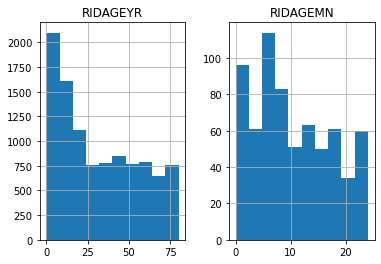

In [21]:
df[["RIDAGEYR", "RIDAGEMN"]].hist()

In [22]:
pd.crosstab(df["RIDAGEYR"], df["RIDAGEMN"])

RIDAGEMN,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0,24.0
RIDAGEYR,,,,,,,,,,,,,,,,,,,,,,,,,
0,28,42,26,28,33,38,44,32,39,44,31,20,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,20,27,16,29,21,24,25,12,18,16,22,30,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8


In [23]:
DROP_COLS += ["RIDAGEMN"]
WHITELIST_COLS += ["RIDAGEYR"]

GENDER

In [24]:
df["RIAGENDR"].value_counts()

2    5172
1    5003
Name: RIAGENDR, dtype: int64

Household Income ($)

array([[<AxesSubplot:title={'center':'INDHHIN2'}>]], dtype=object)

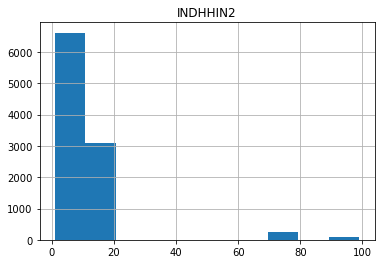

In [25]:
df[["INDHHIN2"]].hist()

grip strength (kg)

<AxesSubplot:>

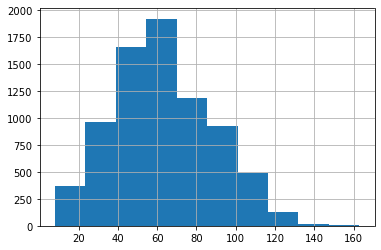

In [26]:
df["MGDCGSZ"].hist()

### DATA CLEANING

#### CATEGORICAL FEATURES

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10175 entries, 73557 to 83731
Columns: 1811 entries, SDDSRVYR to WHQ520
dtypes: float64(1756), int64(24), object(31)
memory usage: 140.7+ MB


In [28]:
cat_df = df.select_dtypes(include=[object])
cat_df.head()

,OHX02CTC,OHX03CTC,OHX04CTC,OHX05CTC,OHX06CTC,OHX07CTC,OHX08CTC,OHX09CTC,OHX10CTC,OHX11CTC,OHX12CTC,OHX13CTC,OHX14CTC,OHX15CTC,OHX18CTC,OHX19CTC,OHX20CTC,OHX21CTC,OHX22CTC,OHX23CTC,OHX24CTC,OHX25CTC,OHX26CTC,OHX27CTC,OHX28CTC,OHX29CTC,OHX30CTC,OHX31CTC,CSXTSEQ,SMDUPCA,SMD100BR
SEQN,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
73557,P,P,P,P,P,P,P,P,P,P,P,P,P,P,P,P,P,P,P,P,P,P,P,P,P,P,P,P,B,NaN,NaN
73558,Z,J,S,S,S,S,S,S,S,S,S,Z,Z,Z,E,E,J,S,S,S,S,S,S,S,Z,S,E,E,A,NaN,NaN
73559,Z,Z,Z,S,S,S,S,Z,S,S,S,S,Z,Z,Z,Z,Z,S,S,Z,S,S,S,S,S,Z,Z,E,A,NaN,NaN
73560,U,S,D,K,U,S,S,S,S,U,K,D,S,U,U,S,D,K,D,S,S,S,S,U,D,D,S,U,NaN,NaN,NaN
73561,E,Z,E,Z,Z,Z,R,R,Z,Z,Z,Z,Z,E,E,E,E,E,S,Z,R,Z,S,Z,E,E,E,E,A,NaN,NaN


#### Tooth Coronal Caries (OHX _ _ CTC)
https://wwwn.cdc.gov/Nchs/Nhanes/1999-2000/OHXDENT.htm#OHX31CTC

| Code or Value |              Value Description              |
|:-------------:|:-------------------------------------------:|
| E             | Missing due to dental disease               |
| M             | Missing due to other causes                 |
| R             | Missing due to dental disease but replaced  |
| S             | Sound permanent tooth                       |
| U             | Unerupted                                   |
| X             | Missing due to other causes but replaced    |
| Y             | Tooth present, condition cannot be assessed |
| Z             | Permanent tooth with surface condition (s)  |
| < blank >     | Missing                                     |

In [29]:
oe = OrdinalEncoder()

oe.fit_transform(df[[x for x in cat_df.columns if x.startswith("OHX")]])

array([[ 3.,  3.,  5., ...,  5.,  3.,  3.],
       [10.,  1.,  8., ...,  8.,  0.,  0.],
       [10., 11., 11., ..., 12., 10.,  0.],
       ...,
       [10., 11.,  1., ...,  8.,  0., 10.],
       [ 7.,  6.,  3., ...,  3.,  6.,  8.],
       [ 7.,  6.,  0., ...,  3., 10.,  6.]])

SMD100BR: BRAND OF CIGARETTES SMOKED BY SP (SUB-BRAND INCLUDED IF APPLICABLE AND AVAILABLE)

In [30]:
df["SMD100BR"].value_counts()

NEWPORT              217
MARLBORO             216
MARLBORO GOLD        121
KOOL                  37
CAMEL CRUSH           31
                    ... 
WILD HORSE RED         1
KENT GOLDEN            1
EAGLE 20's ORANGE      1
CHEROKEE               1
CRAVEN A               1
Name: SMD100BR, Length: 130, dtype: int64

In [31]:
ft = FunctionTransformer(lambda x: pd.notna(x).astype(int))
ft.fit_transform(df["SMD100BR"]).value_counts()

0    9083
1    1092
Name: SMD100BR, dtype: int64

SMDUPCA: Cigarette 12-digit Universal Product Code (UPC) -> DROP

CSXTSEQ: Sequence in which whole mouth taste tests were administered -> DROP

In [32]:
DROP_COLS += ["SMDUPCA", "CSXTSEQ"]

In [33]:
WHITELIST_COLS += ["SMD100BR"] + [x for x in cat_df.columns if x.startswith("OHX")]

#### NULLS

In [34]:
nulls = pd.isna(df).sum() / len(df) * 100
nulls.sort_values(ascending=False)

MCQ240I     100.0
BMIHEAD     100.0
SMQ861      100.0
MCQ240R     100.0
SMQ690J     100.0
            ...  
DMDHHSZA      0.0
DMDHHSZE      0.0
DMDHHSZB      0.0
HUQ010        0.0
SDDSRVYR      0.0
Length: 1811, dtype: float64

<AxesSubplot:ylabel='Frequency'>

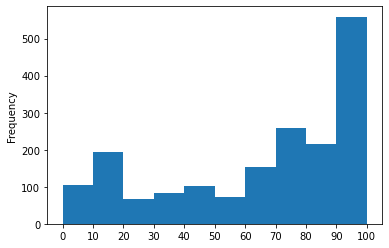

In [35]:
nulls.plot(kind="hist", xticks=range(0,110,10))

In [36]:
nulls[nulls > 50].index

Index(['RIDAGEMN', 'RIDEXAGM', 'DMQADFC', 'DMDYRSUS', 'DMDEDUC3', 'RIDEXPRG',
       'PEASCCT1', 'BPXCHR', 'BPXSY4', 'BPXDI4',
       ...
       'WHD080S', 'WHD080T', 'WHD080U', 'WHD080L', 'WHD110', 'WHD120',
       'WHD130', 'WHQ030M', 'WHQ500', 'WHQ520'],
      dtype='object', length=1259)

In [37]:
DROP_COLS += nulls[nulls > 50].index.tolist()

#### CHECK FIELDS WITH LOW CARDINALITY

In [38]:
uniq = df.nunique()
uniq.sort_values()

BMIHEAD        0
DRQSDT5        0
MCQ240I        0
MCQ240R        0
SMQ690J        0
            ... 
DR1TMFAT    7734
DR1TSFAT    7750
WTDRD1      7931
WTMEC2YR    8170
DR1TMOIS    8428
Length: 1811, dtype: int64

In [39]:
DROP_COLS += uniq[uniq <= 1].index.tolist()

### DELETE COLUMNS

In [40]:
DROP_COLS = [x for x in set(DROP_COLS) if x not in WHITELIST_COLS]

In [41]:
df = df.drop(columns=DROP_COLS, errors="ignore")
df.shape

(10175, 547)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10175 entries, 73557 to 83731
Columns: 547 entries, RIDSTATR to WHQ150
dtypes: float64(495), int64(23), object(29)
memory usage: 42.5+ MB


## DIMENSIONALITY REDUCTION using PCA

**Principal Component Analysis** is a dimensionality-reduction method that is used to reduce the dimensionality of large data sets, by transforming a large set of variables into a smaller one that still contains most of the information in the large set.

Reducing the number of variables naturally comes at the expense of accuracy but smaller data sets are easier to explore and visualize and make analyzing data much easier and faster for machine learning algorithms.


*Credits:* [https://builtin.com/data-science/step-step-explanation-principal-component-analysis](https://builtin.com/data-science/step-step-explanation-principal-component-analysis).

#### PCA STEP 1. Standardization
PCA is sensitive regarding the variances of the initial variables. If there are large differences between the ranges of initial variables, those variables with larger ranges will dominate over those with small ranges which will lead to biased results.

So, we can use z-scores (a.k.a. sklearn.preprocessing.StandardScaler) to prevent this problem. 


#### PCA STEP 2. Covariance Matrix
Compute the covariance matrix to understand how the input variables are varying from the mean with respect to each other, or in other words, see if there is any relationship between them.

If positive then : the two variables increase or decrease together (correlated)
If negative then : One increases when the other decreases (Inversely correlated)

##### Covariance properties
`Cov(a,a)=Var(a)`

`Cov(a,b)=Cov(b,a)`


#### PCA STEP 3. Eigenvectors and Eigenvalues of the Covariance Matrix
*Principal components* are new variables that are constructed as linear combinations or mixtures of the initial variables.
These combinations are done in such a way that the new variables (i.e., principal components) are uncorrelated and most of the information within the initial variables is squeezed or compressed into the first components. 

*Eigenvectors and eigenvalues* are the linear algebra concepts that we need to compute from the covariance matrix in order to determine the principal components of the data.


To put all this simply, just think of principal components as new axes that provide the best angle to see and evaluate the data, so that the differences between the observations are better visible.

As there are as many principal components as there are variables in the data, principal components are constructed in such a manner that the first principal component accounts for the largest possible variance in the data set. 

For example, let’s assume that the scatter plot of our data set is as shown below, can we guess the first principal component? Yes, it’s approximately the line that matches the purple marks.

![](./img/PCA.gif)

The second principal component is calculated in the same way, with the condition that it is uncorrelated with (i.e., perpendicular to) the first principal component and that it accounts for the next highest variance.

This continues until a total of p principal components have been calculated, equal to the original number of variables.


Eigenvectors and eigenvalues are behind all the magic explained above, because:
- *eigenvectors* of the Covariance matrix are actually the directions of the axes where there is the most variance(most information) and that we call Principal Components
- *eigenvalues* are simply the coefficients attached to eigenvectors, which give the amount of variance carried in each Principal Component.

By ranking your eigenvectors in order of their eigenvalues, highest to lowest, you get the principal components in order of significance.

After having the principal components, to compute the percentage of variance (information) accounted for by each component, we divide the eigenvalue of each component by the sum of eigenvalues. 


#### PCA PIPELINE DEFINITION

In [43]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [44]:
def get_model(df):
    all_columns = df.columns.tolist()

    ct = ColumnTransformer([
        ("ordinal_encoder", OrdinalEncoder(), [all_columns.index(x) for x in cat_df.columns if x.startswith("OHX")]),
        ("boolean_transformer", FunctionTransformer(lambda x: pd.notna(x).astype(int)), [all_columns.index(x) for x in ["SMD100BR"]])
    ], remainder="passthrough")

    si = SimpleImputer(strategy="most_frequent")

    ss = StandardScaler() # Standardize the data to have a mean of ~0 and a variance of 1

    # Create a PCA instance: pca
    pca = PCA(n_components=50, random_state=42)

    pipe = Pipeline([
        ('column_transformer', ct), 
        ('imputer', si),
        ('scaler', ss),
        ('pca', pca)
    ])
    
    return pipe

In [45]:
pipe = get_model(df)

In [46]:
%%time 
pipe.fit(df)

Wall time: 1.25 s


Pipeline(steps=[('column_transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinal_encoder',
                                                  OrdinalEncoder(),
                                                  [123, 124, 125, 126, 127, 128,
                                                   129, 130, 131, 132, 133, 134,
                                                   135, 136, 137, 138, 139, 140,
                                                   141, 142, 143, 144, 145, 146,
                                                   147, 148, 149, 150]),
                                                 ('boolean_transformer',
                                                  FunctionTransformer(func=<function get_model.<locals>.<lambda> at 0x000001F10B9A8160>),
                                                  [521])])),
                ('imputer', SimpleImputer(strategy='most_frequent')),
                ('scaler'

In [47]:
from sklearn import config_context

with config_context(display="diagram"):
    display(pipe)

Pipeline(steps=[('column_transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinal_encoder',
                                                  OrdinalEncoder(),
                                                  [123, 124, 125, 126, 127, 128,
                                                   129, 130, 131, 132, 133, 134,
                                                   135, 136, 137, 138, 139, 140,
                                                   141, 142, 143, 144, 145, 146,
                                                   147, 148, 149, 150]),
                                                 ('boolean_transformer',
                                                  FunctionTransformer(func=<function get_model.<locals>.<lambda> at 0x000001F10B9A8160>),
                                                  [521])])),
                ('imputer', SimpleImputer(strategy='most_frequent')),
                ('scaler', StandardScaler()),
                ('pca', PCA(n_components=50, random_state=42))])

#### PCA STEP 4. Number of Principal Components
We want to keep only *p* eigenvectors (components) out of *n*, in this way out final data set will have only *p* dimensions.

It’s up to you to choose whether to keep all the components or discard the ones of lesser significance, depending on what you are looking for. 

If you just want to describe your data in terms of *principal components* that are uncorrelated without seeking to reduce dimensionality, leaving out lesser significant components is not needed.

But in our case we want to reduce dimensionality, so we can use the `variance explained criteria`.
We can now build the feature vector which is simply a matrix that has as columns the eigenvectors of the components that we decide to keep.


In [48]:
def plot_pca_variances(pca): # Plot the explained variances
    plt.bar(range(pca.n_components), pca.explained_variance_ratio_, color='black')
    plt.xlabel('PCA features')
    plt.ylabel('variance %')
    plt.show()


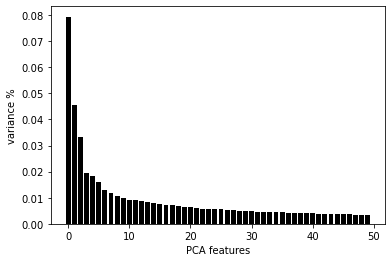

In [49]:
plot_pca_variances(pipe["pca"])

#### PCA STEP 5. Transform data along the principal component axis
The aim is to reorient the data from the original axes to the ones represented by the principal components.

This can be done by multiplying the transpose of the original data set by the transpose of the feature vector.

```
FinalDataset = FeatureVectorᵀ * StandardizeOriginalDatasetᵀ
```


In [50]:
pipe = get_model(df)
pipe.set_params(pca__n_components=7)
pipe.fit(df)
principal_components = pipe.transform(df)

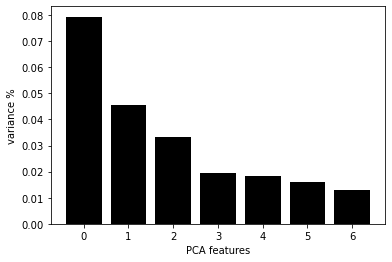

In [51]:
plot_pca_variances(pipe["pca"])

In [52]:
# Save components to a DataFrame
principal_components_df = pd.DataFrame(
    principal_components,
    index=df.index,
    columns=[
        f"PCA{i+1}" for i in range(principal_components.shape[1])
    ]
)
principal_components_df.head()

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7
SEQN,,,,,,,
73557,5.897396,-10.253015,8.792921,2.208200,3.479974,-3.879677,-0.521180
73558,13.830025,12.525351,11.213923,0.702220,-0.903324,2.168469,4.427836
73559,6.722035,-1.840032,-1.957163,-4.283048,3.023512,0.401800,-2.876164
73560,-6.496596,2.269491,0.605488,2.677176,3.839537,0.174182,0.102453
73561,4.973716,-5.726621,3.463663,1.851903,7.050696,0.809858,-0.347530


<AxesSubplot:xlabel='PCA1', ylabel='PCA2'>

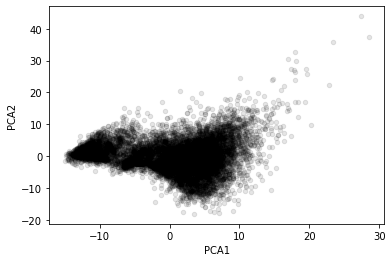

In [53]:
principal_components_df.plot(kind="scatter", x="PCA1", y="PCA2", alpha=.1, color='black')

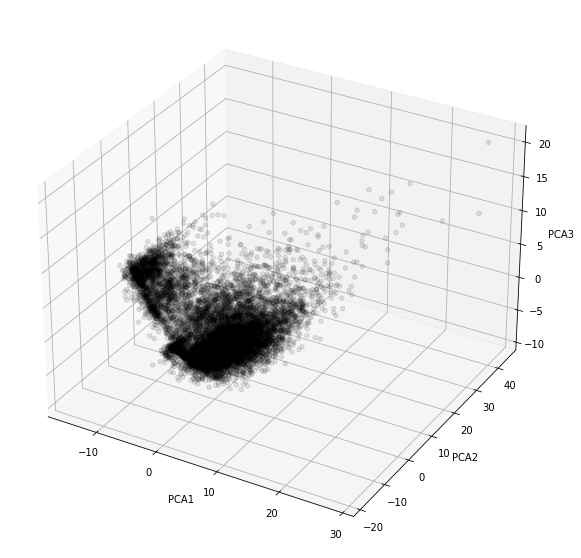

In [54]:
plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
p = ax.scatter3D(
    principal_components_df["PCA1"], 
    principal_components_df["PCA2"], 
    principal_components_df["PCA3"], 
    alpha=.1, color='black'
)
ax.set_xlabel("PCA1")
ax.set_ylabel("PCA2")
ax.set_zlabel("PCA3")

plt.show()

### PCA PROS and CONS
PRO:
Organizing information in principal components this way, will allow you to reduce dimensionality without losing much information, and this by discarding the components with low information and considering the remaining components as your new variables.

CONS:
An important thing to realize here is that, the principal components are less interpretable and don’t have any real meaning since they are constructed as linear combinations of the initial variables.


## EIGENVECTOR EXPLAINABILITY

In [55]:
pca = pipe["pca"]

In [56]:
# eigenvalues
pca.explained_variance_

array([43.42442613, 24.92686885, 18.30523899, 10.74020326, 10.11918376,
        8.68176161,  7.05616385])

In [57]:
# eigenvectors
pca.components_

array([[-0.01574293, -0.00684142,  0.07953493, ..., -0.0446506 ,
         0.0089003 ,  0.00424592],
       [ 0.05407243,  0.053192  , -0.00702138, ...,  0.01813999,
        -0.01630241, -0.01073037],
       [-0.07871646, -0.075937  , -0.11915623, ...,  0.02883438,
         0.00575292,  0.00243446],
       ...,
       [-0.00520136, -0.00708151, -0.00722973, ...,  0.01818343,
        -0.01845039,  0.01299697],
       [ 0.08144062,  0.07509985,  0.01864446, ..., -0.07675939,
         0.0132315 , -0.00059949],
       [-0.00060204, -0.01294512, -0.01914254, ...,  0.01709209,
         0.04421027,  0.00826895]])

In [58]:
# take PCA input data (using the pipeline without the last step)
transformation_pipe = get_model(df)
transformation_pipe.set_params(pca="passthrough")
transformation_pipe.fit(df)

Pipeline(steps=[('column_transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinal_encoder',
                                                  OrdinalEncoder(),
                                                  [123, 124, 125, 126, 127, 128,
                                                   129, 130, 131, 132, 133, 134,
                                                   135, 136, 137, 138, 139, 140,
                                                   141, 142, 143, 144, 145, 146,
                                                   147, 148, 149, 150]),
                                                 ('boolean_transformer',
                                                  FunctionTransformer(func=<function get_model.<locals>.<lambda> at 0x000001F108560B80>),
                                                  [521])])),
                ('imputer', SimpleImputer(strategy='most_frequent')),
                ('scaler'

###### map input / output columns
ColumnTransformer can change the feature order and the mapping is not yet supported out-of-box by sklearn.
We can use the following workaround

In [59]:
# input/output col indexes for each step
column_transformers_input_index = transformation_pipe["column_transformer"]._transformer_to_input_indices
column_transformers_output_index = transformation_pipe["column_transformer"].output_indices_

In [60]:
column_transformers_in_out_col_mapping = {}

for t in column_transformers_input_index.keys():
    in_index = column_transformers_input_index[t]
    # input col names
    in_col_names = transformation_pipe["column_transformer"].feature_names_in_[in_index]
    out_index_slice = column_transformers_output_index[t]
    out_index = list(range(transformation_pipe["column_transformer"]._n_features)[out_index_slice])
    # map input col names to output index
    partial_mapping = dict(zip(in_col_names, out_index))
    # save it to a dictionary
    column_transformers_in_out_col_mapping.update(partial_mapping)
    
# column names re-ordered based on output order
column_transformers_output_col_names = sorted(transformation_pipe["column_transformer"].feature_names_in_, key=column_transformers_in_out_col_mapping.get)

In [61]:
# here we have the data received in input by PCA
transformed_df = pd.DataFrame(
    transformation_pipe.transform(df),
    index=df.index,
    columns=column_transformers_output_col_names
)

In [62]:
transformed_df.head()

,OHX02CTC,OHX03CTC,OHX04CTC,OHX05CTC,OHX06CTC,OHX07CTC,OHX08CTC,OHX09CTC,OHX10CTC,OHX11CTC,OHX12CTC,OHX13CTC,OHX14CTC,OHX15CTC,OHX18CTC,OHX19CTC,OHX20CTC,OHX21CTC,OHX22CTC,OHX23CTC,OHX24CTC,OHX25CTC,OHX26CTC,OHX27CTC,OHX28CTC,OHX29CTC,OHX30CTC,OHX31CTC,SMD100BR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDRETH1,RIDRETH3,RIDEXMON,DMQMILIZ,DMDBORN4,DMDCITZN,DMDEDUC2,DMDMARTL,SIALANG,SIAPROXY,SIAINTRP,FIALANG,FIAPROXY,FIAINTRP,MIALANG,MIAPROXY,MIAINTRP,AIALANGA,DMDHHSIZ,DMDFMSIZ,DMDHHSZA,DMDHHSZB,DMDHHSZE,DMDHRGND,DMDHRAGE,DMDHRBR4,DMDHREDU,DMDHRMAR,DMDHSEDU,WTINT2YR,WTMEC2YR,SDMVPSU,SDMVSTRA,INDHHIN2,INDFMIN2,INDFMPIR,PEASCST1,PEASCTM1,BPAARM,BPACSZ,BPXPLS,BPXPULS,BPXPTY,BPXML1,BPXSY1,BPXDI1,BPAEN1,BPXSY2,BPXDI2,BPAEN2,BPXSY3,BPXDI3,BPAEN3,BMDSTATS,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,BMXSAD1,BMXSAD2,BMDAVSAD,MGDEXSTS,MGD050,MGQ070,MGQ100,MGD130,MGQ90DG,MGDSEAT,MGAPHAND,MGATHAND,MGXH1T1,MGXH1T1E,MGXH2T1,MGXH2T1E,MGXH1T2,MGXH1T2E,MGXH2T2,MGXH2T2E,MGXH1T3,MGXH1T3E,MGXH2T3,MGXH2T3E,MGDCGSZ,OHDEXSTS,OHDDESTS,OHX01TC,OHX02TC,OHX03TC,OHX04TC,OHX05TC,OHX06TC,OHX07TC,OHX08TC,OHX09TC,OHX10TC,OHX11TC,OHX12TC,OHX13TC,OHX14TC,OHX15TC,OHX16TC,OHX17TC,OHX18TC,OHX19TC,OHX20TC,OHX21TC,OHX22TC,OHX23TC,OHX24TC,OHX25TC,OHX26TC,OHX27TC,OHX28TC,OHX29TC,OHX30TC,OHX31TC,OHX32TC,WTDRD1,WTDR2D,DR1DRSTZ,DR1EXMER,DRABF,DRDINT,DR1DBIH,DR1DAY,DR1LANG,DR1MNRSP,DR1HELPD,DBQ095Z,DBD100,DRQSPREP,DR1STY,DRQSDIET,DR1TNUMF,DR1TKCAL,DR1TPROT,DR1TCARB,DR1TSUGR,DR1TFIBE,DR1TTFAT,DR1TSFAT,DR1TMFAT,DR1TPFAT,DR1TCHOL,DR1TATOC,DR1TATOA,DR1TRET,DR1TVARA,DR1TACAR,DR1TBCAR,DR1TCRYP,DR1TLYCO,DR1TLZ,DR1TVB1,DR1TVB2,DR1TNIAC,DR1TVB6,DR1TFOLA,DR1TFA,DR1TFF,DR1TFDFE,DR1TCHL,DR1TVB12,DR1TB12A,DR1TVC,DR1TVD,DR1TVK,DR1TCALC,DR1TPHOS,DR1TMAGN,DR1TIRON,DR1TZINC,DR1TCOPP,DR1TSODI,DR1TPOTA,DR1TSELE,DR1TCAFF,DR1TTHEO,DR1TALCO,DR1TMOIS,DR1TS040,DR1TS060,DR1TS080,DR1TS100,DR1TS120,DR1TS140,DR1TS160,DR1TS180,DR1TM161,DR1TM181,DR1TM201,DR1TM221,DR1TP182,DR1TP183,DR1TP184,DR1TP204,DR1TP205,DR1TP225,DR1TP226,DR1.300,DR1.320Z,DR1.330Z,DR1BWATZ,DR1TWS,DRD340,DRD360,DRD370A,DRD370B,DRD370C,DRD370D,DRD370E,DRD370F,DRD370G,DRD370H,DRD370I,DRD370J,DRD370K,DRD370L,DRD370M,DRD370N,DRD370O,DRD370P,DRD370Q,DRD370R,DRD370S,DRD370T,DRD370U,URXUMA,URXUMS,URXUCR.x,URXCRS,URDACT,LBXSAL,LBDSALSI,LBXSAPSI,LBXSASSI,LBXSATSI,LBXSBU,LBDSBUSI,LBXSC3SI,LBXSCA,LBDSCASI,LBXSCH,LBDSCHSI,LBXSCK,LBXSCLSI,LBXSCR,LBDSCRSI,LBXSGB,LBDSGBSI,LBXSGL,LBDSGLSI,LBXSGTSI,LBXSIR,LBDSIRSI,LBXSKSI,LBXSLDSI,LBXSNASI,LBXSOSSI,LBXSPH,LBDSPHSI,LBXSTB,LBDSTBSI,LBXSTP,LBDSTPSI,LBXSTR,LBDSTRSI,LBXSUA,LBDSUASI,LBXWBCSI,LBXLYPCT,LBXMOPCT,LBXNEPCT,LBXEOPCT,LBXBAPCT,LBDLYMNO,LBDMONO,LBDNENO,LBDEONO,LBDBANO,LBXRBCSI,LBXHGB,LBXHCT,LBXMCVSI,LBXMCHSI,LBXMC,LBXRDW,LBXPLTSI,LBXMPSI,PHQ020,PHQ030,PHQ040,PHQ050,PHQ060,PHAFSTHR.x,PHAFSTMN.x,PHDSESN,LBDHDD,LBDHDDSI,LBXHA,LBXHBS,LBXHBC,LBDHBG,LBDHD,LBDHEG,LBDHEM,LBXGH,WTSH2YR.x,LBXIHG,LBDIHGSI,LBDIHGLC,LBXBGE,LBDBGELC,LBXBGM,LBDBGMLC,LBXTC,LBDTCSI,LBXTTG,WTSH2YR.y,LBXBPB,LBDBPBSI,LBXBCD,LBDBCDSI,LBDBCDLC,LBXTHG,LBDTHGSI,LBDTHGLC,LBXBSE,LBDBSESI,LBXBMN,LBDBMNSI,URXVOL1,URDFLOW1,LBDB12,LBDB12SI,ALQ101,BPQ020,BPQ056,BPQ059,BPQ080,CBD070,CBD090,CBD110,CBD120,CBD130,HSD010,HSQ500,HSQ510,HSQ520,HSQ571,HSQ590,HSAQUEX,DIQ010,DIQ160,DIQ170,DIQ172,DIQ180,DIQ050,DBQ700,DBQ197,DBQ229,DBD895,DBD900,DBD905,DBD910,CBQ596,CBQ505,CBQ535,CBQ545,CBQ550,CBQ552,CBQ580,CBQ590,DLQ010,DLQ020,DLQ040,DLQ050,DLQ060,DLQ080,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,FSD032A,FSD032B,FSD032C,FSD032D,FSD032E,FSD032F,FSDHH,FSDAD,FSDCH,FSD151,FSQ165,FSQ162,HEQ010,HEQ030,HIQ011,HIQ270,HIQ210,HOD050,HOQ065,HUQ010,HUQ020,HUQ030,HUQ041,HUQ051,HUQ071,HUQ090,IMQ011,IMQ020,INQ020,INQ012,INQ030,INQ060,INQ080,INQ090,INQ132,INQ140,INQ150,IND235,INDFMMPI,INDFMMPC,INQ244,MCQ010,MCQ053,MCQ070,MCQ080,MCQ082,MCQ086,MCQ092,MCQ160A,MCQ160N,MCQ160B,MCQ160C,MCQ160D,MCQ160E,MCQ160F,MCQ160G,MCQ160M,MCQ160K,MCQ160L,MCQ160O,MCQ203,MCQ220,MCQ300A,MCQ300B,MCQ300C,MCQ365A,MCQ365B,MCQ365C,MCQ365D,MCQ370A,MCQ370B,MCQ370C,MCQ370D,OCD150,OCD390G,OH

#### how PCA works (example on a single element and single component)

In [63]:
pca.components_[0][:10]

array([-0.01574293, -0.00684142,  0.07953493,  0.08261449,  0.09870395,
        0.08131754,  0.07615482,  0.07551349,  0.08270813,  0.09856331])

In [64]:
transformed_df.iloc[0].shape, pca.components_[0].shape

((547,), (547,))

In [65]:
# calculate PCA1 for the first element
transformed_df.iloc[0].dot(pca.components_[0])

5.8973955205255235

In [66]:
# comparison
principal_components_df.iloc[0]

PCA1     5.897396
PCA2   -10.253015
PCA3     8.792921
PCA4     2.208200
PCA5     3.479974
PCA6    -3.879677
PCA7    -0.521180
Name: 73557, dtype: float64

#### explain the first principal component

In [67]:
from operator import itemgetter

In [68]:
# read column description from json file
col_decoder_df = pd.read_json("../data/nutrition_survey/column_decoder.json", orient="index").reset_index()
col_decoder_df.columns = ["code", "desc"]
col_decoder_df.head()

,code,desc
0,ACD011A,speak_english
1,AIALANGA,speak_english2
2,ALQ101,drink_alcohol
3,ALQ130,alcohol_per_day
4,AUQ136,ear_infections


In [69]:
pca1_top_cols = sorted(enumerate(abs(pca.components_[0])), key=itemgetter(1), reverse=True)[:10]
pca1_top_cols_df = pd.DataFrame(pca1_top_cols, columns=["col_idx", "imp"])
pca1_top_cols_df["col_code"] = pca1_top_cols_df["col_idx"].apply(lambda i: column_transformers_output_col_names[i])
pca1_top_cols_df.merge(col_decoder_df, left_on="col_code", right_on="code")

,col_idx,imp,col_code,code,desc
0,41,0.122704,SIAPROXY,SIAPROXY,proxy_respondent
1,86,0.120394,BMXWT,BMXWT,weight_kg
2,386,0.119020,HSAQUEX,HSAQUEX,health_status_source_data
3,90,0.114715,BMXARML,BMXARML,upper_arm_length
4,91,0.111273,BMXARMC,BMXARMC,arm_circum
5,31,0.110052,RIDAGEYR,RIDAGEYR,age
6,92,0.104511,BMXWAIST,BMXWAIST,waist_circum
7,23,0.101666,OHX27CTC,OHX27CTC,coronal_caries
8,18,0.099791,OHX22CTC,OHX22CTC,coronal_caries


## SAVE DATASET

In [70]:
principal_components_df.head()

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7
SEQN,,,,,,,
73557,5.897396,-10.253015,8.792921,2.208200,3.479974,-3.879677,-0.521180
73558,13.830025,12.525351,11.213923,0.702220,-0.903324,2.168469,4.427836
73559,6.722035,-1.840032,-1.957163,-4.283048,3.023512,0.401800,-2.876164
73560,-6.496596,2.269491,0.605488,2.677176,3.839537,0.174182,0.102453
73561,4.973716,-5.726621,3.463663,1.851903,7.050696,0.809858,-0.347530


In [71]:
export_df = pd.concat([principal_components_df, df], axis=1)
export_df.head()

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,RIDSTATR,RIAGENDR,RIDAGEYR,RIDRETH1,RIDRETH3,RIDEXMON,DMQMILIZ,DMDBORN4,DMDCITZN,DMDEDUC2,DMDMARTL,SIALANG,SIAPROXY,SIAINTRP,FIALANG,FIAPROXY,FIAINTRP,MIALANG,MIAPROXY,MIAINTRP,AIALANGA,DMDHHSIZ,DMDFMSIZ,DMDHHSZA,DMDHHSZB,DMDHHSZE,DMDHRGND,DMDHRAGE,DMDHRBR4,DMDHREDU,DMDHRMAR,DMDHSEDU,WTINT2YR,WTMEC2YR,SDMVPSU,SDMVSTRA,INDHHIN2,INDFMIN2,INDFMPIR,PEASCST1,PEASCTM1,BPAARM,BPACSZ,BPXPLS,BPXPULS,BPXPTY,BPXML1,BPXSY1,BPXDI1,BPAEN1,BPXSY2,BPXDI2,BPAEN2,BPXSY3,BPXDI3,BPAEN3,BMDSTATS,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,BMXSAD1,BMXSAD2,BMDAVSAD,MGDEXSTS,MGD050,MGQ070,MGQ100,MGD130,MGQ90DG,MGDSEAT,MGAPHAND,MGATHAND,MGXH1T1,MGXH1T1E,MGXH2T1,MGXH2T1E,MGXH1T2,MGXH1T2E,MGXH2T2,MGXH2T2E,MGXH1T3,MGXH1T3E,MGXH2T3,MGXH2T3E,MGDCGSZ,OHDEXSTS,OHDDESTS,OHX01TC,OHX02TC,OHX03TC,OHX04TC,OHX05TC,OHX06TC,OHX07TC,OHX08TC,OHX09TC,OHX10TC,OHX11TC,OHX12TC,OHX13TC,OHX14TC,OHX15TC,OHX16TC,OHX17TC,OHX18TC,OHX19TC,OHX20TC,OHX21TC,OHX22TC,OHX23TC,OHX24TC,OHX25TC,OHX26TC,OHX27TC,OHX28TC,OHX29TC,OHX30TC,OHX31TC,OHX32TC,OHX02CTC,OHX03CTC,OHX04CTC,OHX05CTC,OHX06CTC,OHX07CTC,OHX08CTC,OHX09CTC,OHX10CTC,OHX11CTC,OHX12CTC,OHX13CTC,OHX14CTC,OHX15CTC,OHX18CTC,OHX19CTC,OHX20CTC,OHX21CTC,OHX22CTC,OHX23CTC,OHX24CTC,OHX25CTC,OHX26CTC,OHX27CTC,OHX28CTC,OHX29CTC,OHX30CTC,OHX31CTC,WTDRD1,WTDR2D,DR1DRSTZ,DR1EXMER,DRABF,DRDINT,DR1DBIH,DR1DAY,DR1LANG,DR1MNRSP,DR1HELPD,DBQ095Z,DBD100,DRQSPREP,DR1STY,DRQSDIET,DR1TNUMF,DR1TKCAL,DR1TPROT,DR1TCARB,DR1TSUGR,DR1TFIBE,DR1TTFAT,DR1TSFAT,DR1TMFAT,DR1TPFAT,DR1TCHOL,DR1TATOC,DR1TATOA,DR1TRET,DR1TVARA,DR1TACAR,DR1TBCAR,DR1TCRYP,DR1TLYCO,DR1TLZ,DR1TVB1,DR1TVB2,DR1TNIAC,DR1TVB6,DR1TFOLA,DR1TFA,DR1TFF,DR1TFDFE,DR1TCHL,DR1TVB12,DR1TB12A,DR1TVC,DR1TVD,DR1TVK,DR1TCALC,DR1TPHOS,DR1TMAGN,DR1TIRON,DR1TZINC,DR1TCOPP,DR1TSODI,DR1TPOTA,DR1TSELE,DR1TCAFF,DR1TTHEO,DR1TALCO,DR1TMOIS,DR1TS040,DR1TS060,DR1TS080,DR1TS100,DR1TS120,DR1TS140,DR1TS160,DR1TS180,DR1TM161,DR1TM181,DR1TM201,DR1TM221,DR1TP182,DR1TP183,DR1TP184,DR1TP204,DR1TP205,DR1TP225,DR1TP226,DR1.300,DR1.320Z,DR1.330Z,DR1BWATZ,DR1TWS,DRD340,DRD360,DRD370A,DRD370B,DRD370C,DRD370D,DRD370E,DRD370F,DRD370G,DRD370H,DRD370I,DRD370J,DRD370K,DRD370L,DRD370M,DRD370N,DRD370O,DRD370P,DRD370Q,DRD370R,DRD370S,DRD370T,DRD370U,URXUMA,URXUMS,URXUCR.x,URXCRS,URDACT,LBXSAL,LBDSALSI,LBXSAPSI,LBXSASSI,LBXSATSI,LBXSBU,LBDSBUSI,LBXSC3SI,LBXSCA,LBDSCASI,LBXSCH,LBDSCHSI,LBXSCK,LBXSCLSI,LBXSCR,LBDSCRSI,LBXSGB,LBDSGBSI,LBXSGL,LBDSGLSI,LBXSGTSI,LBXSIR,LBDSIRSI,LBXSKSI,LBXSLDSI,LBXSNASI,LBXSOSSI,LBXSPH,LBDSPHSI,LBXSTB,LBDSTBSI,LBXSTP,LBDSTPSI,LBXSTR,LBDSTRSI,LBXSUA,LBDSUASI,LBXWBCSI,LBXLYPCT,LBXMOPCT,LBXNEPCT,LBXEOPCT,LBXBAPCT,LBDLYMNO,LBDMONO,LBDNENO,LBDEONO,LBDBANO,LBXRBCSI,LBXHGB,LBXHCT,LBXMCVSI,LBXMCHSI,LBXMC,LBXRDW,LBXPLTSI,LBXMPSI,PHQ020,PHQ030,PHQ040,PHQ050,PHQ060,PHAFSTHR.x,PHAFSTMN.x,PHDSESN,LBDHDD,LBDHDDSI,LBXHA,LBXHBS,LBXHBC,LBDHBG,LBDHD,LBDHEG,LBDHEM,LBXGH,WTSH2YR.x,LBXIHG,LBDIHGSI,LBDIHGLC,LBXBGE,LBDBGELC,LBXBGM,LBDBGMLC,LBXTC,LBDTCSI,LBXTTG,WTSH2YR.y,LBXBPB,LBDBPBSI,LBXBCD,LBDBCDSI,LBDBCDLC,LBXTHG,LBDTHGSI,LBDTHGLC,LBXBSE,LBDBSESI,LBXBMN,LBDBMNSI,URXVOL1,URDFLOW1,LBDB12,LBDB12SI,ALQ101,BPQ020,BPQ056,BPQ059,BPQ080,CBD070,CBD090,CBD110,CBD120,CBD130,HSD010,HSQ500,HSQ510,HSQ520,HSQ571,HSQ590,HSAQUEX,DIQ010,DIQ160,DIQ170,DIQ172,DIQ180,DIQ050,DBQ700,DBQ197,DBQ229,DBD895,DBD900,DBD905,DBD910,CBQ596,CBQ505,CBQ535,CBQ545,CBQ550,CBQ552,CBQ580,CBQ590,DLQ010,DLQ020,DLQ040,DLQ050,DLQ060,DLQ080,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,FSD032A,FSD032B,FSD032C,FSD032D,FSD032E,FSD032F,FSDHH,FSDAD,FSDCH,FSD151,FSQ165,FSQ162,HEQ010,HEQ030,HIQ011,HIQ270,HIQ210,HOD050,HOQ065,HUQ010,HUQ020,HUQ030,HUQ041,HUQ051,HUQ071,HUQ090,IMQ011,IMQ020,INQ020,INQ012,INQ030,INQ060,INQ080,INQ090,INQ132,INQ140,INQ150,IND235,INDFMMPI,INDFMMPC,INQ244,MCQ010,MCQ053,MCQ070,MCQ080,MCQ082,MCQ086,MCQ092,MCQ160A,MCQ160N,MCQ160B,MCQ160C,MCQ160D,MCQ160E,MCQ160F,MCQ160G,MCQ160M,MCQ160K,MCQ160L,MCQ160O,MCQ203,MCQ220,MCQ300A,MCQ300B,MCQ300C,MCQ365A,MCQ365B,MCQ365C,MCQ365D,MCQ370A,MCQ370B,MCQ370C

In [72]:
export_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10175 entries, 73557 to 83731
Columns: 554 entries, PCA1 to WHQ150
dtypes: float64(502), int64(23), object(29)
memory usage: 43.1+ MB


In [73]:
export_df.to_pickle("../data/nutrition_survey/data_with_pca.pkl")